# Getting started with tslab

This notebook show the basic usage of tslab with TypeScript.

## More examples

After you go through this notebook, see these notebooks to understand advanced topics.

- [Getting started for JavaScript users](getting_started_javascript.ipynb)
- [Deep learning in JavaScript with TensorFlow.js](tensorflow.ipynb)

## Writing and running your code interactively

- Write and run TypeScript interactively.
- To complete code, press `Tab`.
- To inspect code, press `Shift-Tab`.

In [ ]:
import * as tslab from 'tslab';

console.log('Hello, tslab!')
console.log('Versions:', tslab.versions)

Hello, tslab!
Versions: { tslab: '1.0.14', typescript: '4.1.2', node: 'v14.15.1' }


In [ ]:
/** naiveFib calculates Fibonacci number in a naive way */
function naiveFib(n: number): number {
    if (n > 1) {
        return naiveFib(n - 1) + naiveFib(n - 2);
    }
    return 1;
}

In [ ]:
{
    // This is 40x slower if you use Python.
    const n = 40;
    const start = Date.now()
    console.log(`naiveFib(${n}) = ${naiveFib(n)} (took ${Date.now() - start}ms)`)
}

naiveFib(40) = 165580141 (took 1109ms)


# class and interface

You can use all TypeScript features including `class` and `interface` with the power of type-safety.

In [ ]:
interface Hello {
    getMessage(): string;
}

class HelloImpl implements Hello {
    private name: string;

    constructor(name: string) {
        this.name = name;
    }
    
    getMessage(): string {
        return `Hello, ${this.name}!`;
    }
}

function printMessage(h: Hello) {
    console.log(h.getMessage());
}

printMessage(new HelloImpl('tslab'));

Hello, tslab!


## Promise and async await

tslab supports `async` and `await` from ES2017. tslab also supports top-level `await`.
You can call asynchronous functions easily in tslab.

In [ ]:
let sleep = (ms: number) => new Promise(resolve => setTimeout(resolve, ms));
const start = Date.now();
// Top-level await.
await sleep(500);
`Slept ${Date.now() - start}[ms]`

Slept 501[ms]


In [ ]:
// If you don't `await`, tslab shows `Promise` immediately.
sleep(500);

Promise { <pending> }


## display

To display non-plain text data, use `tslab.display`.

In [ ]:
import fs from "fs";
import * as tslab from "tslab";

### display HTML

In [ ]:
tslab.display.html('Hello <span style="color:#007ACC;font-size:x-large"><b>Type</b>Script</span>!')

Hello Type Script !

### display images

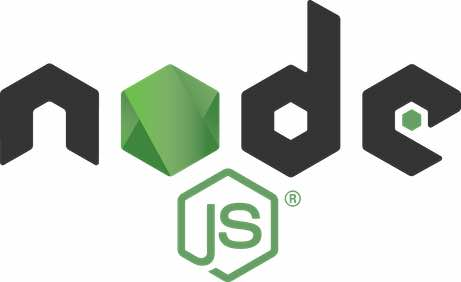

In [ ]:
tslab.display.jpeg(fs.readFileSync('images/nodejs-new-pantone-black.jpg'))

### animation

`tslab.newDisplay` creates a new `Display` instance to display and update rich contents.

In [ ]:
{
    let display = tslab.newDisplay();
    for (let progress = 1; progress <= 100; progress++) {
      await sleep(20);
      display.text(`progress: ${progress}%`);
    }
}

progress: 100%

## Supported JavaScript/TypeScript language features

`tslab` uses `TypeScript 3.7` internally. You can use all of latest JavaScript language features and even the latest features supported from `TypeScript 3.7`.

### ES2015 (ES6)

Demostrations of selected [ES2015 features](https://babeljs.io/docs/en/learn/).

In [ ]:
{
    // class
    class MyObj {
        abc: number;
        xyz: string;
        constructor(abc: number, xyz: string) {
            this.abc = abc;
            this.xyz = xyz;
        }
    }
    // const and let
    const obj = new MyObj(123, 'hello');
    // Destructuring
    let {abc, xyz: klm} =  obj;
    // Enhanced Object Literals
    console.log({abc, klm});
    
    // Spread
    let [x, y, z] = [1, 2, 3];
    console.log({x, y, z})
    
    // Generator and for-of
    let array: number[] = [];
    for (let e of (function*(n: number) {
        for (let i = 0; i < n; i += 2) {
            yield i;
        }
    })(10)) {
        array.push(e * e);
    }
    console.log('array =', array);
}

{ abc: 123, klm: 'hello' }
{ x: 1, y: 2, z: 3 }
array = [ 0, 4, 16, 36, 64 ]


### ES2017

tslab supports `async` and `await` from ES2017. tslab also supports top-level `await`.
You can call asynchronous functions easily in tslab.

In [ ]:
let fn = async () => {
    let sleep = (ms: number) => new Promise(resolve => setTimeout(resolve, ms));
    const start = Date.now();
    await sleep(500);
    return `Slept ${Date.now() - start}[ms]`
}
await fn();

Slept 500[ms]


### ESNext
TypeScript supports some advanced JavaScript features.

In [ ]:
{
    // 1. Optional Chaining
    // https://devblogs.microsoft.com/typescript/announcing-typescript-3-7/#optional-chaining
    let obj = {x: null};
    console.log('obj?.x?.z ==', obj?.x?.z);

    // 2. Nullish Coalescing
    // https://devblogs.microsoft.com/typescript/announcing-typescript-3-7/#nullish-coalescing
    let x = null, y = 0, z = 'hello';
    console.log('x ?? y ?? z ==', x ?? y ?? z);
}

obj?.x?.z == undefined
x ?? y ?? z == 0
